In [62]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import math
import seaborn as sns
import warnings
import matplotlib.font_manager as fm
warnings.filterwarnings(action="ignore")

In [2]:
# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.figsize'] = (10, 10)

##### Quiz

In [123]:
#11-(a)
data = [[38,31,36,29,42,51,39,47,37,46,45,39],[22,14,20,14,23,40,22,31,22,37,25,24],[18,16,15,12,17,34,15,18,20,36,23,22]]
columns = ["00시","02시","04시","06시","08시","10시","12시","14시","16시","18시","20시","22시"]
df = pd.DataFrame(data, columns = columns)
df.columns.name = "시각"
df.index = ["BOD","COD","SS"]
df

시각,00시,02시,04시,06시,08시,10시,12시,14시,16시,18시,20시,22시
BOD,38,31,36,29,42,51,39,47,37,46,45,39
COD,22,14,20,14,23,40,22,31,22,37,25,24
SS,18,16,15,12,17,34,15,18,20,36,23,22


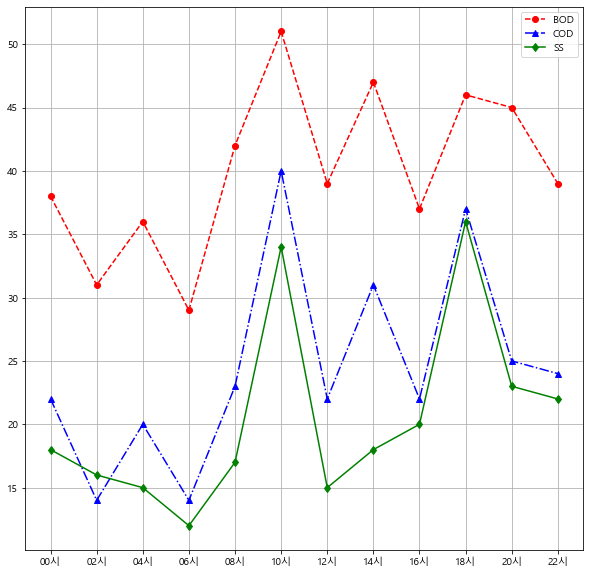

In [124]:
# 11-(b)
plt.plot(columns,data[0],"ro--", label = "BOD")
plt.plot(columns,data[1],"b^-.", label = "COD")
plt.plot(columns,data[2],"gd",linestyle = "solid", label = "SS")
plt.grid()
plt.legend()
plt.show()

In [127]:
# 12-(a)
indexs = ["9.5~19.5","19.5~29.5","29.5~39.5","39.5~49.5","49.5~59.5","59.5~69.5"]
data = pd.Series([9,9,9,10,2,1])
df = pd.DataFrame(data, columns = ["도수"])
df.index = indexs
df.columns.name = "계급간격"
df["상대도수"] = df.도수 / sum(df.도수)
df["계급값"] = [14.5,24.5,34.5,44.5,54.5,64.5]
df["fx"] = df.도수 * df.계급값
xm = (9 * 14.5 + 9 * 24.5 + 9 * 34.5 + 10 * 44.5 + 2 * 54.5 + 1 * 64.5) / 40
df["편차의제곱"] = (df.계급값 - xm)**2
df["편차제곱xfi"] = df.편차의제곱 * df.도수
df

계급간격,도수,상대도수,계급값,fx,편차의제곱,편차제곱xfi
9.5~19.5,9,0.225,14.5,130.5,306.25,2756.25
19.5~29.5,9,0.225,24.5,220.5,56.25,506.25
29.5~39.5,9,0.225,34.5,310.5,6.25,56.25
39.5~49.5,10,0.250,44.5,445.0,156.25,1562.50
49.5~59.5,2,0.050,54.5,109.0,506.25,1012.50
59.5~69.5,1,0.025,64.5,64.5,1056.25,1056.25


In [122]:
# 12 - (b)
std = np.sqrt(sum(df.편차제곱xfi) / (40-1))
std

13.3493493551232

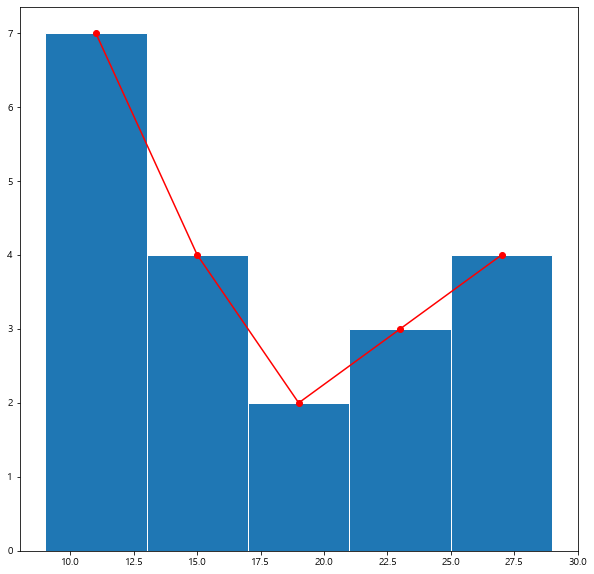

In [104]:
# 13-(a)
data = [12.6,10.5,25.2,20.9,29.5,28.3,12.9,11.2,26.1,
        23.6,18.2,13.1,14.8,11.1,10.2,16.9,26.7,16.7,23.6,17.5]

# 도수분포표 만드는 순서
# 1.k(계급 수)
k = 5
# 2.R(max - min)
R = max(data) - min(data)
# 3.계급간격
w = math.ceil(R/k)
# 4.시작계급값
s = min(data) - 0.5

# 전체 계급구간
bins = np.arange(s, max(data)+w, step=w)

# 계급구간
index = [f'{bins[i]}~{bins[i+1]}' for i in range(len(bins)) if i<len(bins)-1]

# 도수
hist, bins = np.histogram(data, bins)

# DataFrame으로 나타내기
df = pd.DataFrame(hist, index=index, columns=['도수'])
df.index.name = '계급간격'

df['계급값'] = [ int((bins[i]+bins[i+1])/2) for i in range(k)]
df

x = df.계급값.values
x = df.계급값
y = df.도수

df

plt.bar(x,y, edgecolor = "w", width = 4)
plt.plot(x,y,"ro-")
plt.show()

[7. 4. 2. 3. 4.]
[10.2  14.06 17.92 21.78 25.64 29.5 ]
<BarContainer object of 5 artists>
[12.129999999999999, 15.99, 19.85, 23.71, 27.57]


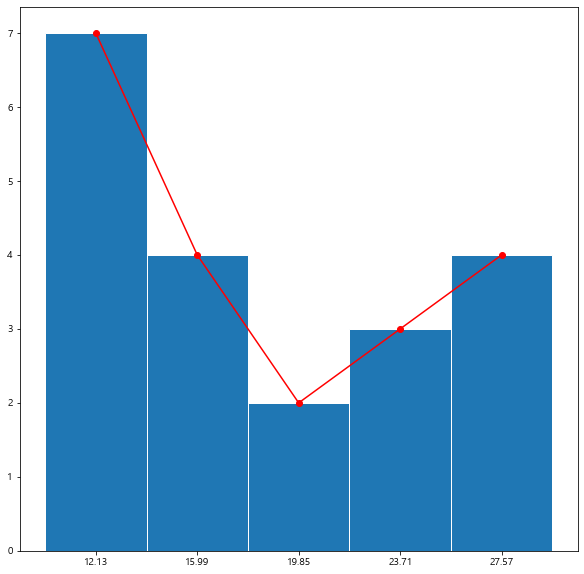

In [120]:
## ver.02
a,b,c = plt.hist(data,bins=5,edgecolor = "w")
print(a) # y값
print(b) # x시작점들, 끝점
print(c) # 칼럼

index = [(b[i]+b[i+1])/2 for i in range(len(b)) if i < len(b) - 1]
print(index)

plt.plot(index,a,"ro-")
plt.xticks(index)
plt.show()

### 4.1.3 Seaborn 기본 설정 
- set_style : darkgrid(Default), whitegrid, dark, white ,ticks

#### 한글, 폰트 크기 설정

<AxesSubplot:>

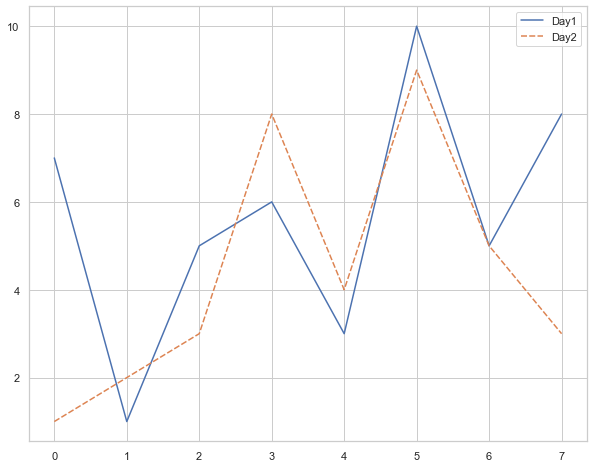

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
sns.set(font = "Malgun Gothic", 
        rc = {"axes.unicode_minus" : False,
             "figure.figsize":(10,8)}, 
        style = "darkgrid",
       font_scale = 1)
sns.despine(left = True, bottom = True)
sns.set_style("whitegrid")


data = {"Day1" : [7,1,5,6,3,10,5,8],
       "Day2" : [1,2,3,8,4,9,5,3]}

df = pd.DataFrame(data)

sns.lineplot(data= df)


## 4.2 Seaborn 그래프

### 4.2.1 Muti plot: 여러 개의 그래프

In [212]:
# data
tips = sns.load_dataset("tips")
penguins = sns.load_dataset("penguins")
anscombes = sns.load_dataset("anscombe")
titanic = sns.load_dataset("titanic")
flights = sns.load_dataset("flights")

tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


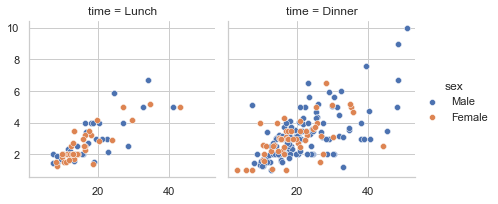

In [173]:
g = sns.FacetGrid(tips, col = "time", hue ="sex")
g.map(sns.scatterplot,"total_bill","tip")
g.map_dataframe(sns.scatterplot,x = "total_bill",y ="tip")
g.add_legend()

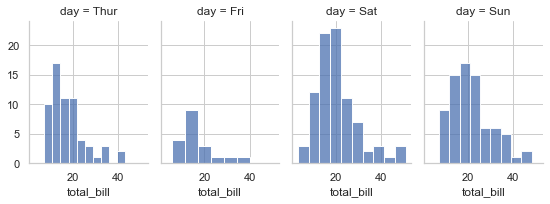

In [176]:
g = sns.FacetGrid(tips, col = "day", aspect =.65)
g.map(sns.histplot, "total_bill")

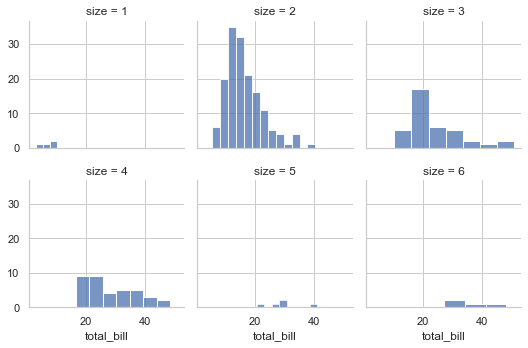

In [178]:
g = sns.FacetGrid(tips, col = "size", height = 2.5, col_wrap = 3)
g.map(sns.histplot, "total_bill")

#### 4.2.2 pairplot : 2개의 변수 조합을 한 번에

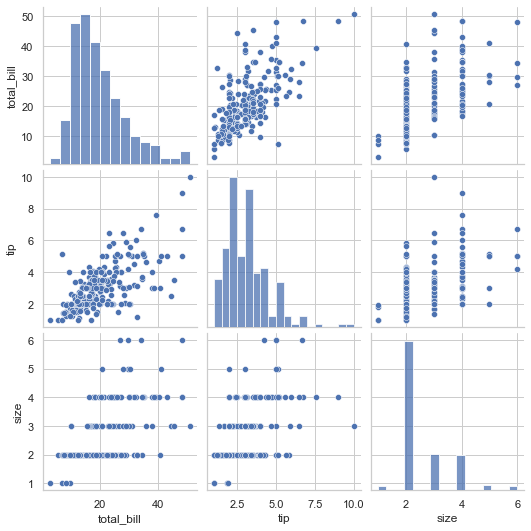

In [180]:
sns.pairplot(data = tips)

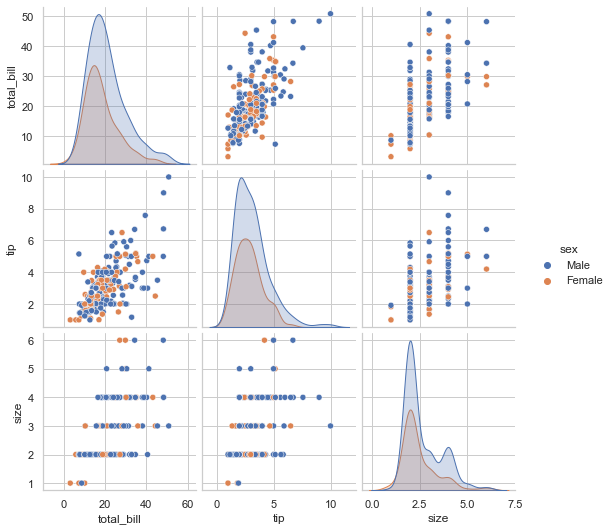

In [181]:
sns.pairplot(data = tips, hue = "sex")

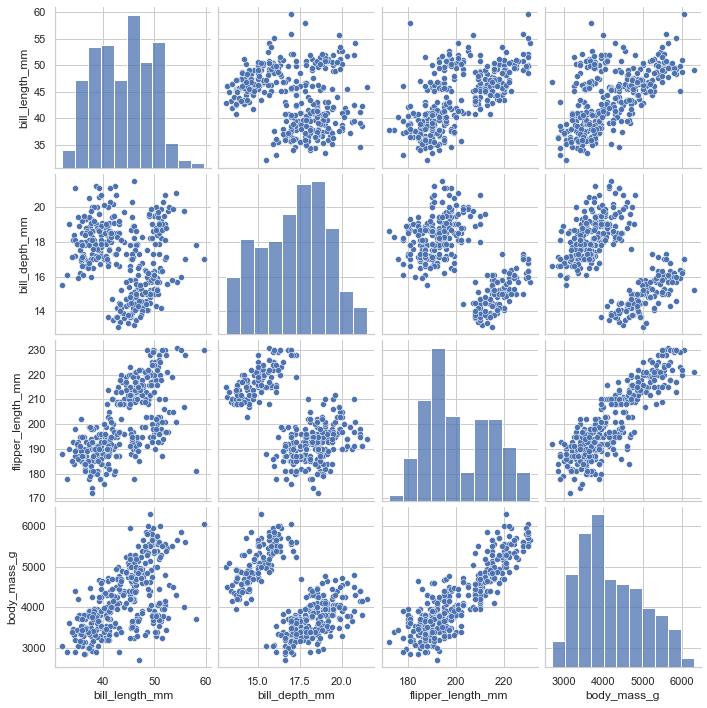

In [182]:
penguin = sns.load_dataset("penguins")
sns.pairplot(penguin)

#### 4.2.3 joinplot : 두 가지 plot을 한번에 보는 방법

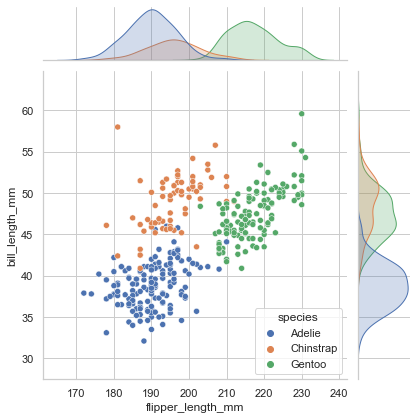

In [186]:
sns.jointplot(data = penguins, 
              x = "flipper_length_mm", 
              y = "bill_length_mm",
             hue = "species")

In [207]:
sns.jointplot(data = penguins,
             x = "bill_lengh_mm",
             y = "bill_depth_mm",
              kind = "cg8")

ValueError: `kind` must be one of ['scatter', 'hist', 'hex', 'kde', 'reg', 'resid'], but cg8 was passed.`

### 4.2.4 Relation Plot : 연속 데이터, 관령성 확인

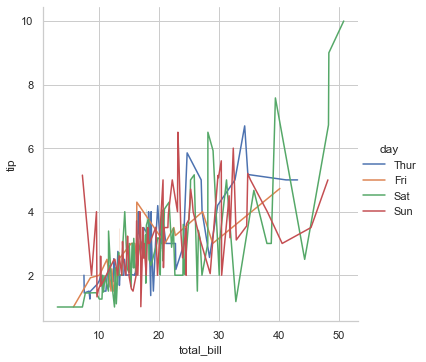

In [202]:
sns.relplot(data=tips, x = "total_bill",
            y="tip", 
            hue = "day",
            kind = "line")

#### scatterplot

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

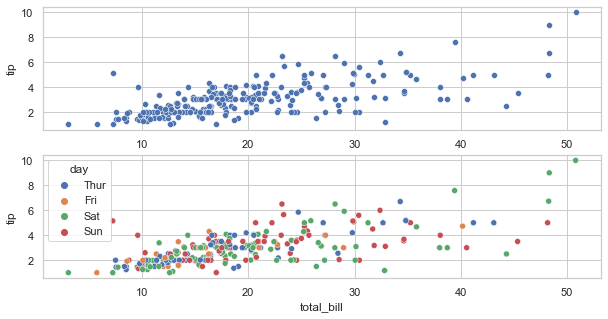

In [197]:
plt.figure(figsize = (10,5))
plt.subplot(211)
sns.scatterplot(data=tips, x ="total_bill", y ="tip")
plt.subplot(212)
sns.scatterplot(data=tips, x ="total_bill", y ="tip", hue = "day")

#### lineplot

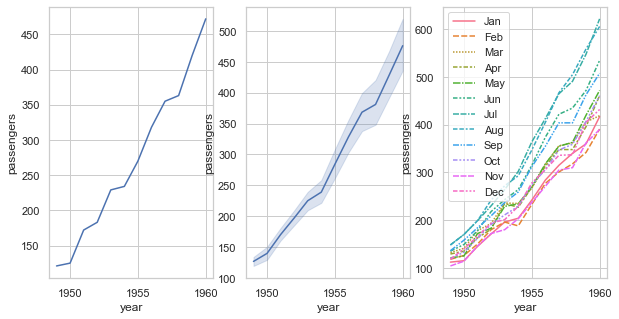

In [219]:
may_flights = flights.query("month == 'May'")
plt.figure(figsize = (10,5))

plt.subplot(131)
# 5월 년도별 승객수
sns.lineplot(data=may_flights, x ="year", y ="passengers")
plt.subplot(132)
# 전체 년도별 승객수
sns.lineplot(data=flights, x ="year", y ="passengers")

# 전체 년도별 월별 승객수
plt.subplot(133)
sns.lineplot(data=flights, x ="year", y ="passengers",
            hue = "month", style = "month")
plt.legend(loc = "upper left")

#### Distribution Plot : 데이터 분포
- displot : 데이터 분포 확인
    - kind 옵션으로 확인 가능(default 값 : hist)

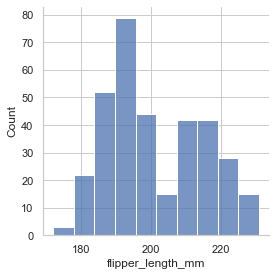

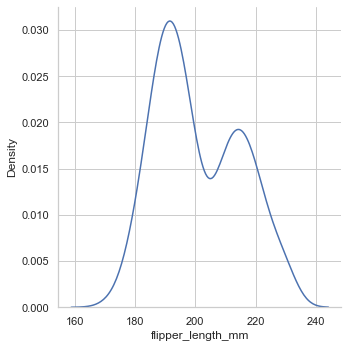

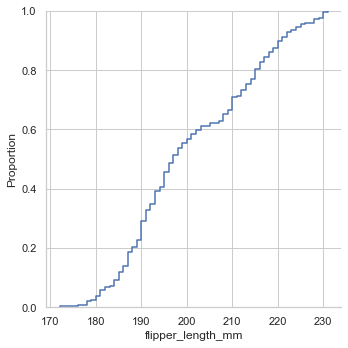

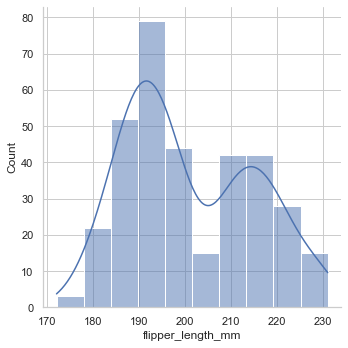

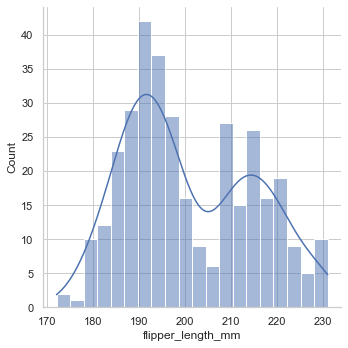

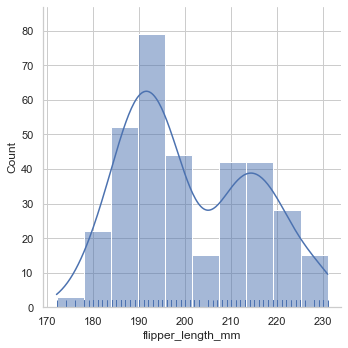

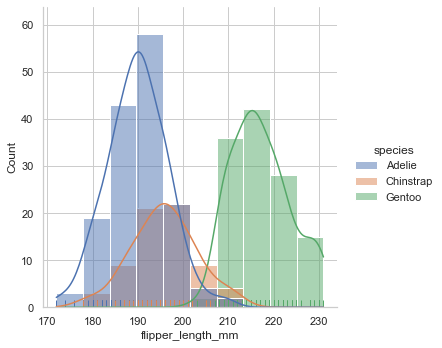

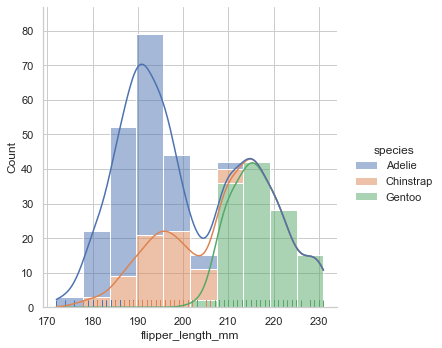

In [235]:
sns.displot(data = penguins, x ="flipper_length_mm", 
            height = 4)

sns.displot(data = penguins, x ="flipper_length_mm",
           kind = "kde")

# 누적 표현
sns.displot(data = penguins, x ="flipper_length_mm",
           kind = "ecdf")

sns.displot(data = penguins, x ="flipper_length_mm",
           kde = True)

sns.displot(data = penguins, x ="flipper_length_mm",
           kde = True, bins = 20)
# rug : 작은 눈금
sns.displot(data = penguins, x ="flipper_length_mm",
           kde = True, rug = True)

sns.displot(data = penguins, x ="flipper_length_mm",
           kde = True,
            rug = True,
           hue = "species")

sns.displot(data = penguins, x ="flipper_length_mm",
           kde = True,
            rug = True,
           hue = "species",
           multiple = "stack")

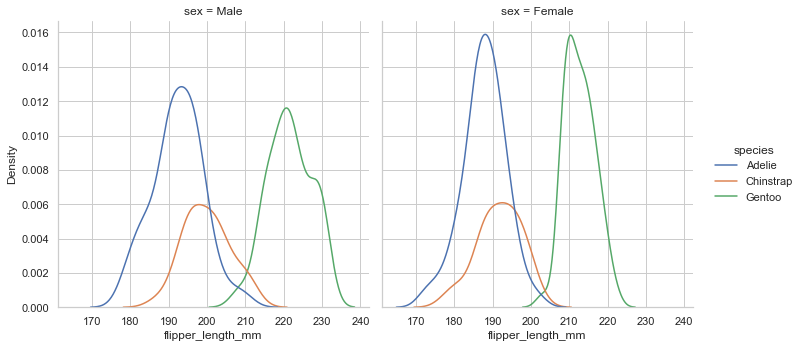

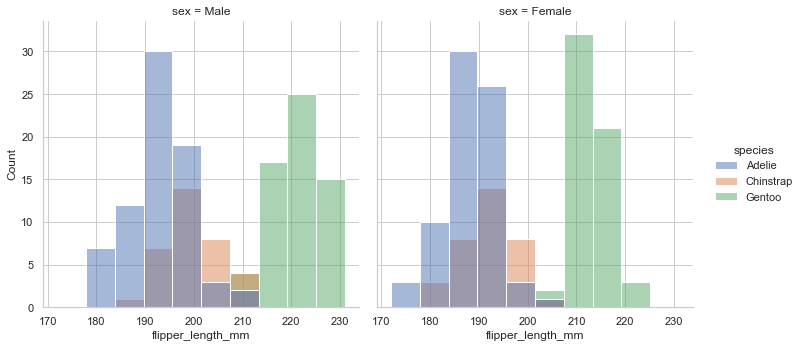

In [234]:
sns.displot(data=penguins, x="flipper_length_mm",
            hue="species",
            col="sex",
            kind="kde")

sns.displot(data=penguins, x="flipper_length_mm",
            hue="species",
            col="sex",
            kind="hist")

#### histplot : 히스토그램

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

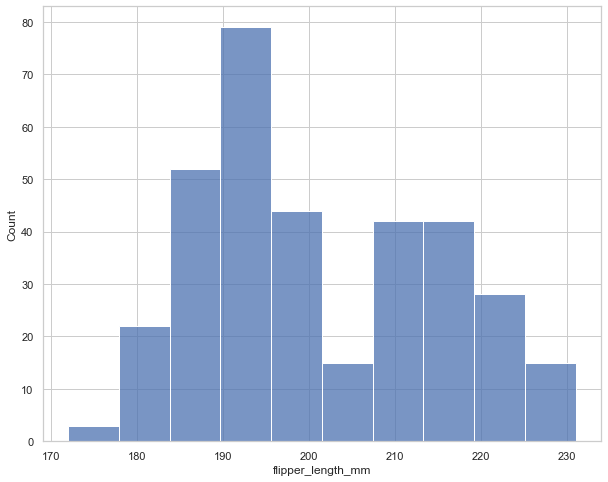

In [236]:
sns.histplot(data=penguins, x="flipper_length_mm")

<AxesSubplot:xlabel='Count', ylabel='flipper_length_mm'>

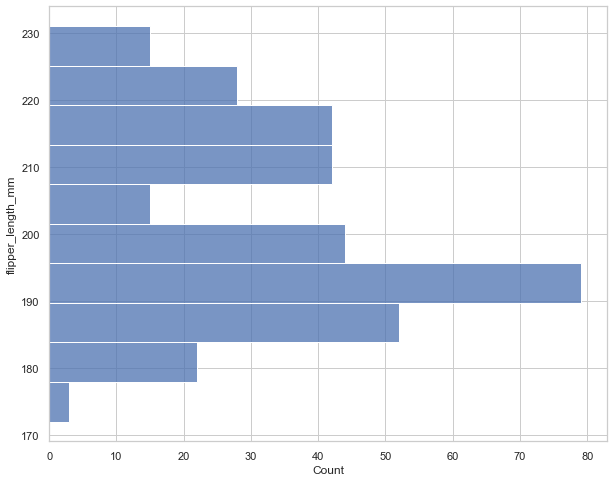

In [237]:
sns.histplot(data=penguins, y="flipper_length_mm")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

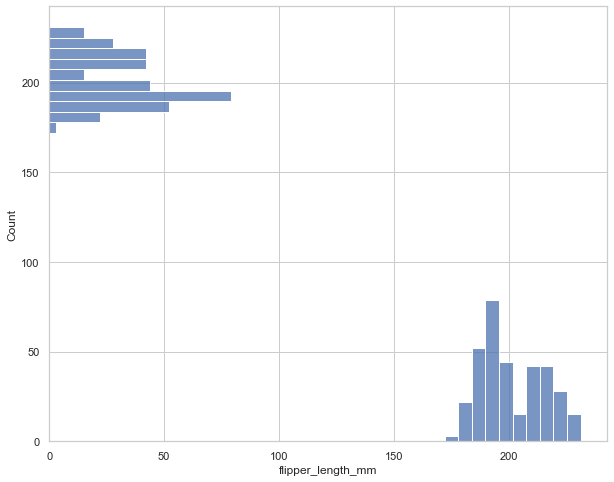

In [238]:
sns.histplot(data=penguins, x="flipper_length_mm")
sns.histplot(data=penguins, y="flipper_length_mm")

<AxesSubplot:xlabel='Count', ylabel='flipper_length_mm'>

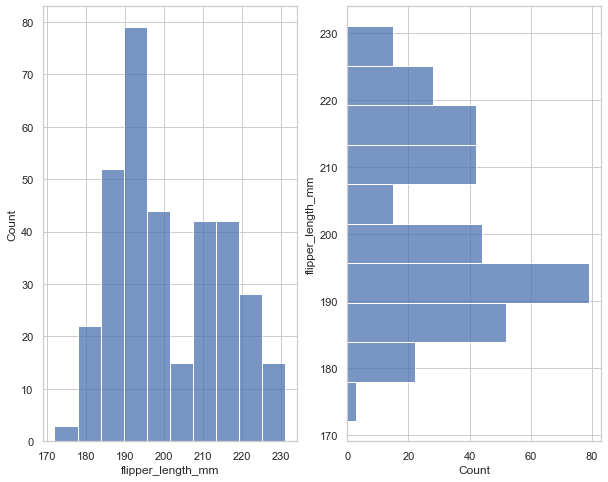

In [239]:
plt.subplot(1,2,1)
sns.histplot(data=penguins, x="flipper_length_mm")
plt.subplot(1,2,2)
sns.histplot(data=penguins, y="flipper_length_mm")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Count'>

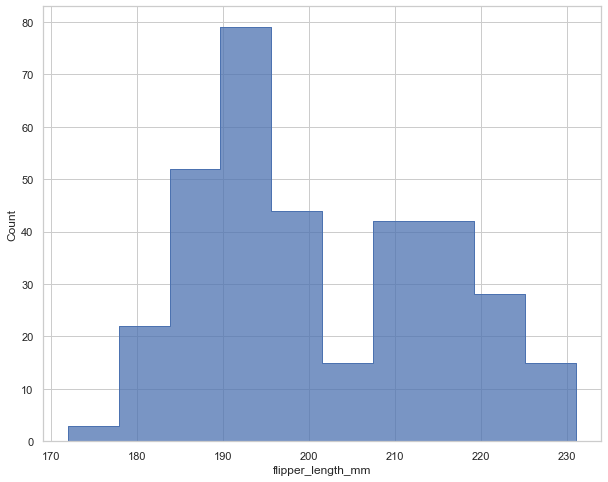

In [240]:
sns.histplot(data=penguins, x="flipper_length_mm", element = "step")

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Density'>

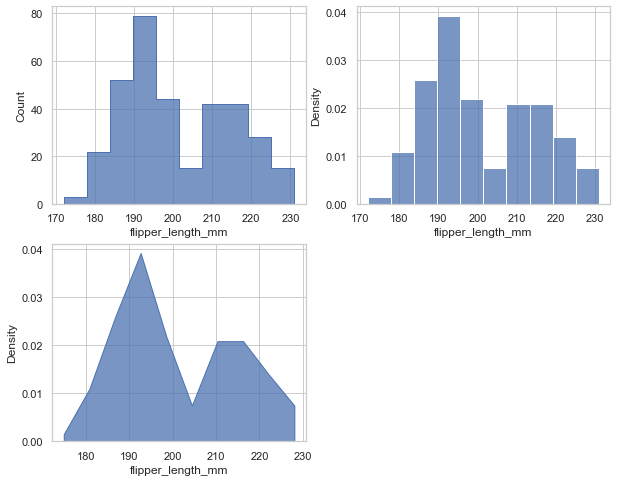

In [245]:
plt.subplot(2,2,1)
sns.histplot(data=penguins, x="flipper_length_mm", element = "step")
plt.subplot(2,2,2)
sns.histplot(data=penguins, x="flipper_length_mm", stat = "density")
plt.subplot(2,2,3)
sns.histplot(data=penguins, x="flipper_length_mm", element = "poly", stat = "density")

#### kedplot : kernel density estimates 커널밀도추정
- 함수를 겹치는 방법으로 히스트그램보다 부드러운 형태의 분포 곡선을 보여주는 방법
- Gaussian Kernel density estimation, 연속된 곡선형태의 그래프 표현

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

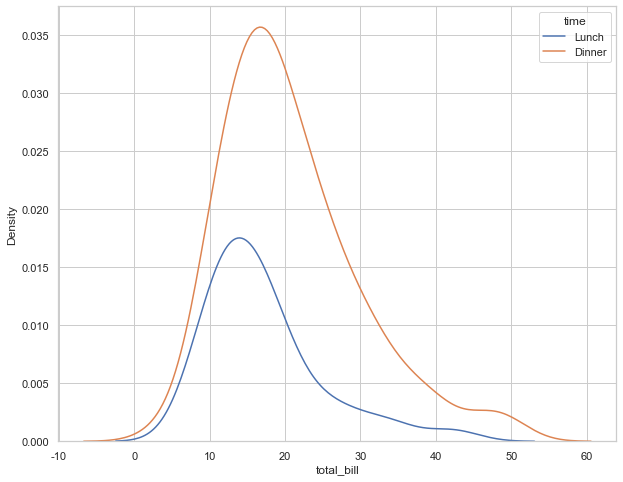

In [251]:
sns.kdeplot(data=tips, x="total_bill", hue="time")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

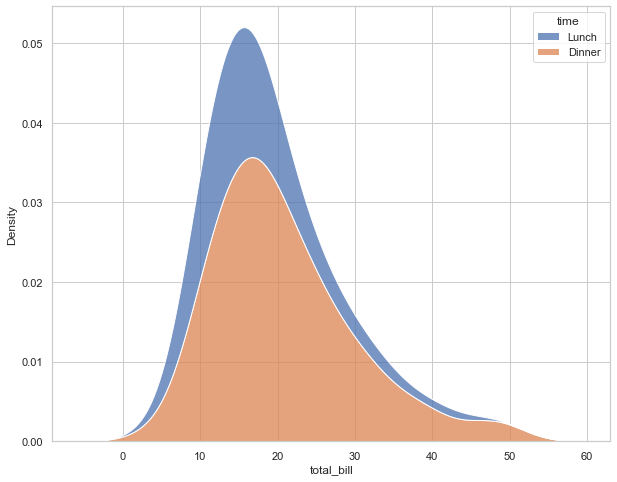

In [250]:
sns.kdeplot(data=tips, x="total_bill", hue="time", multiple="stack")

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

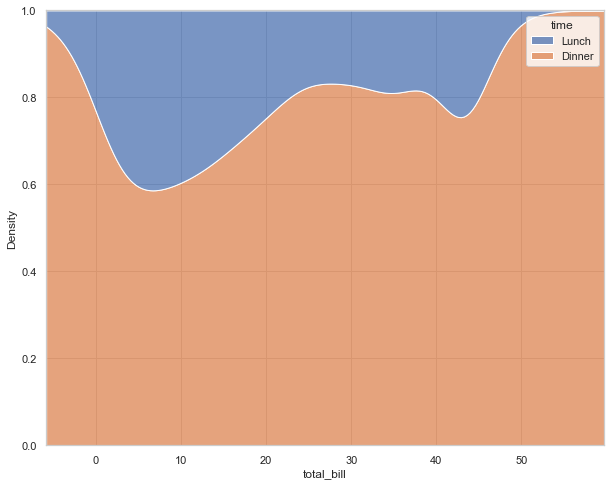

In [252]:
sns.kdeplot(data=tips, x="total_bill", hue="time", multiple="fill")

#### ecdfplot : empirical cumulative distribution function

(경험적) 누적분포 형태의 그래프

<AxesSubplot:xlabel='flipper_length_mm', ylabel='Proportion'>

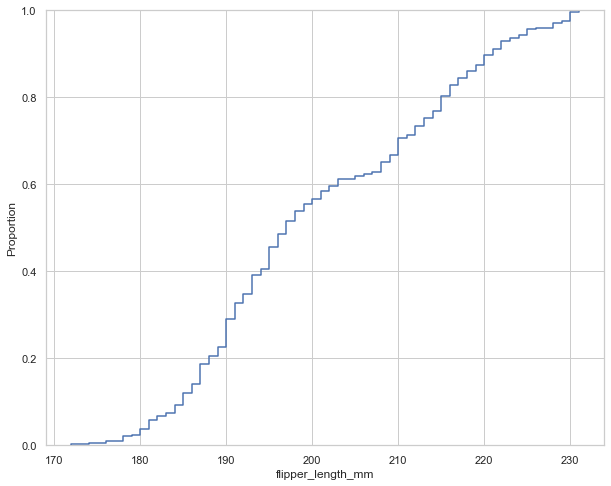

In [253]:
sns.ecdfplot(data=penguins, x="flipper_length_mm")

<AxesSubplot:xlabel='bill_length_mm', ylabel='Proportion'>

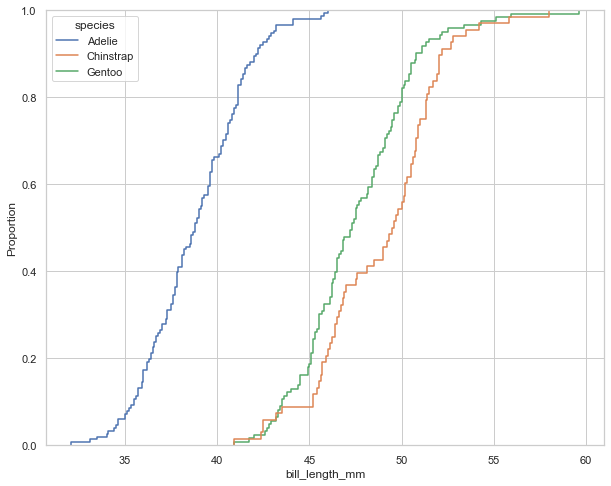

In [254]:
sns.ecdfplot(data=penguins, x="bill_length_mm", hue="species")

#### rugplot : 작은 선분을 나타내는 그래프 형태
- 다른 그래프와 함께 사용하고 실제 데이터의 위치를 보여줌

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

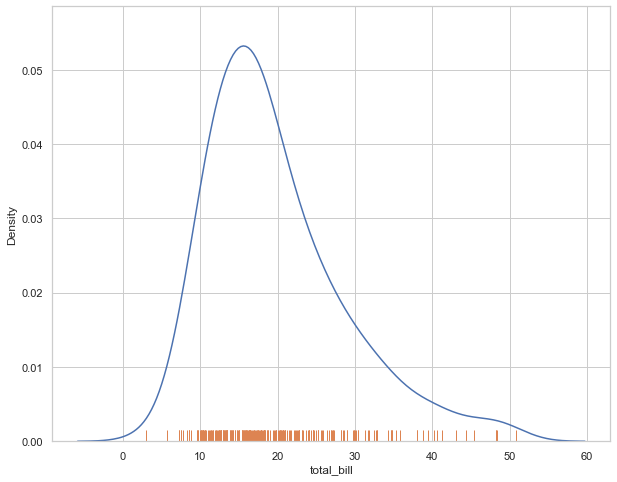

In [257]:
sns.kdeplot(data = tips, x= "total_bill")
sns.rugplot(data = tips, x= "total_bill")

#### distplot

<AxesSubplot:ylabel='Density'>

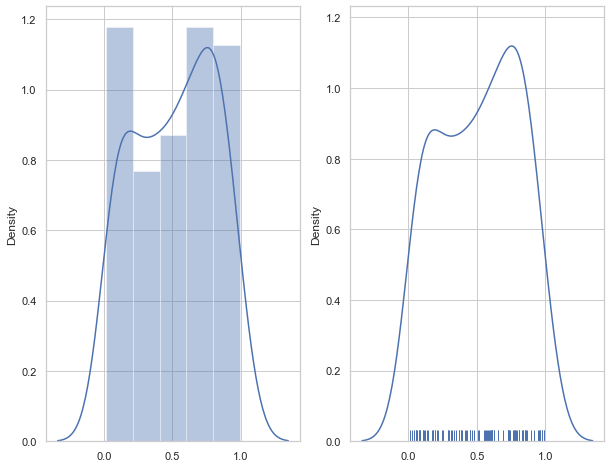

In [260]:
x = np.random.rand(100)
plt.subplot(1,2,1)
sns.distplot(x)
plt.subplot(1,2,2)
sns.distplot(x, rug = True, hist = False)

### 4.2.5. Categoricla Plot : 범주형 데이터, 데이터의 변화 확인

#### catplot

In [266]:
sns.set_theme(style="white")
exercise = sns.load_dataset("exercise")
exercise = exercise.iloc[:,1::]
exercise

,id,diet,pulse,time,kind
0,1,low fat,85,1 min,rest
1,1,low fat,85,15 min,rest
2,1,low fat,88,30 min,rest
3,2,low fat,90,1 min,rest
4,2,low fat,92,15 min,rest
...,...,...,...,...,...
85,29,no fat,135,15 min,running
86,29,no fat,130,30 min,running
87,30,no fat,99,1 min,running
88,30,no fat,111,15 min,running


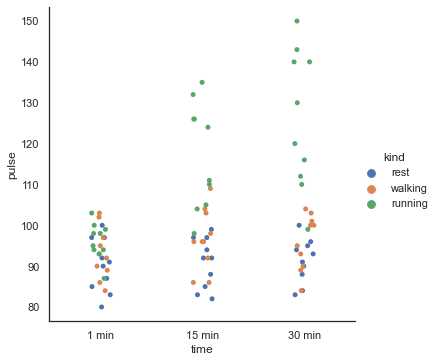

In [267]:
g = sns.catplot(x="time", y="pulse", hue="kind", data=exercise)

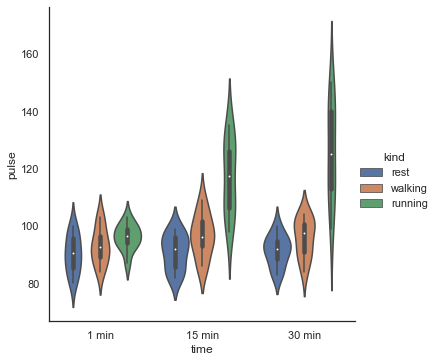

In [268]:
g = sns.catplot(x="time", y="pulse", hue="kind",
               data=exercise, kind="violin")

#### stripplot
- scatter 그래프로 표시됨 범주형 데이터 표현
- 연속형 변수와 범주형 변수 사이의 그래프

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

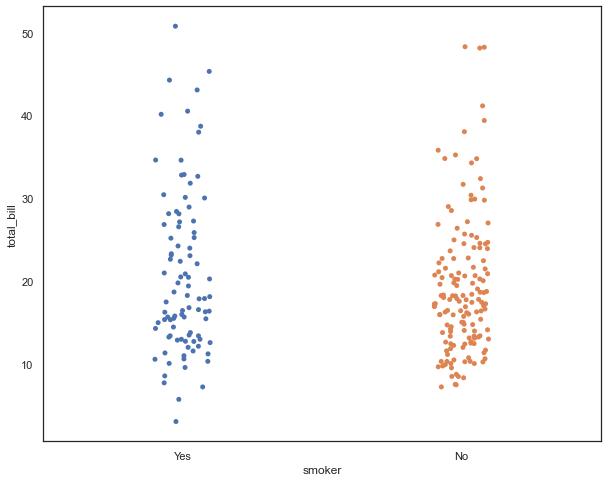

In [269]:
sns.stripplot(data = tips, x = "smoker", y= "total_bill")

#### swarmplot
- stripplot + violinplot의 조합, 데이터의 분포도 함께 확인할 수 있음

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

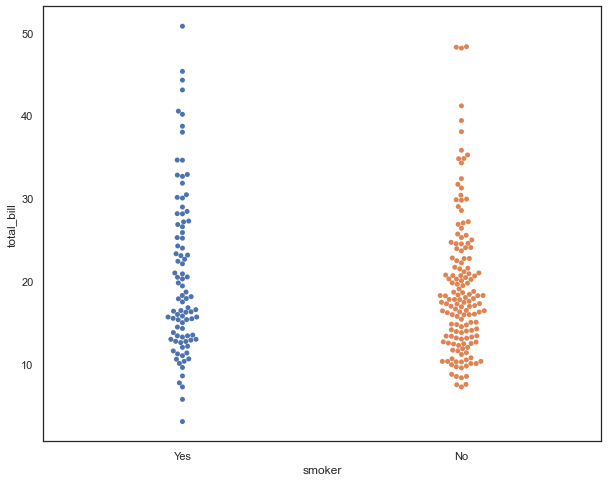

In [271]:
sns.swarmplot(data = tips, x = "smoker", y ="total_bill")

#### violinplot

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

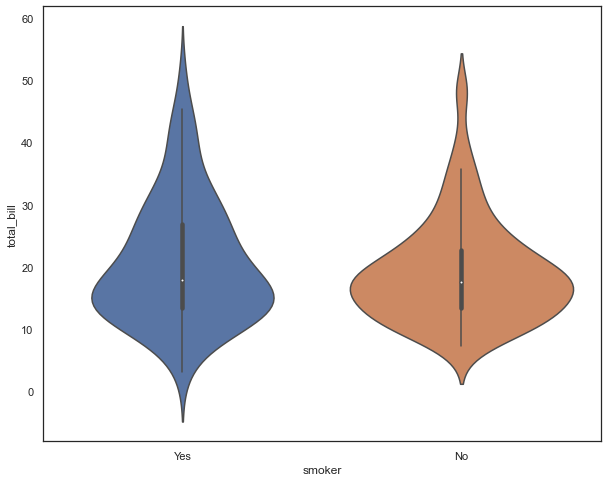

In [273]:
sns.violinplot(data = tips, x ="smoker", y = "total_bill")

#### boxplot
- 이상치(Outlier)를 발견할 수 있다.

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

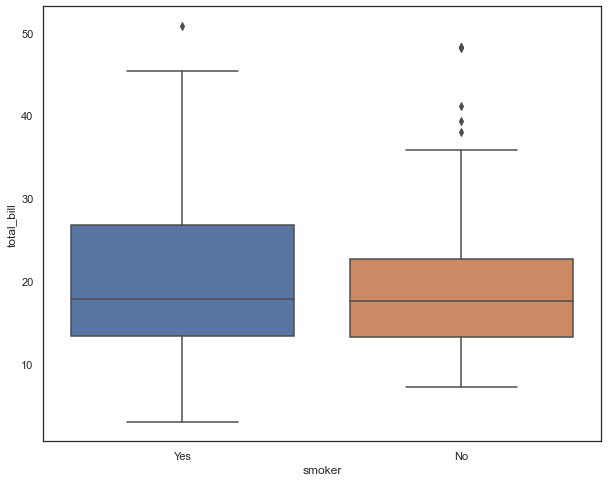

In [274]:
sns.boxplot(data = tips, x ="smoker", y = "total_bill")

#### boxenplot

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

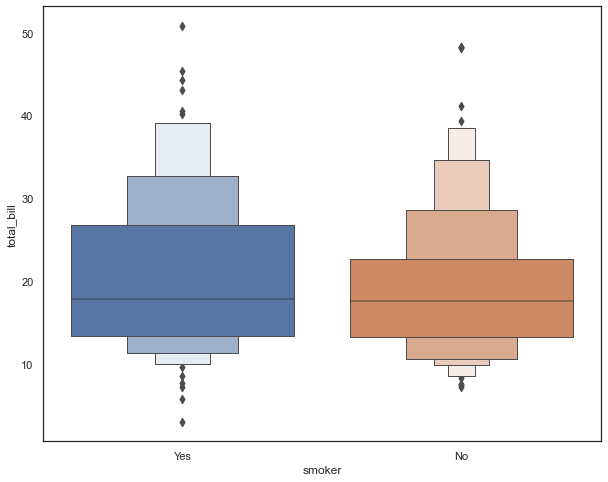

In [289]:
sns.boxenplot(data = tips, x = "smoker", y ="total_bill")

#### barplot

<AxesSubplot:xlabel='smoker', ylabel='total_bill'>

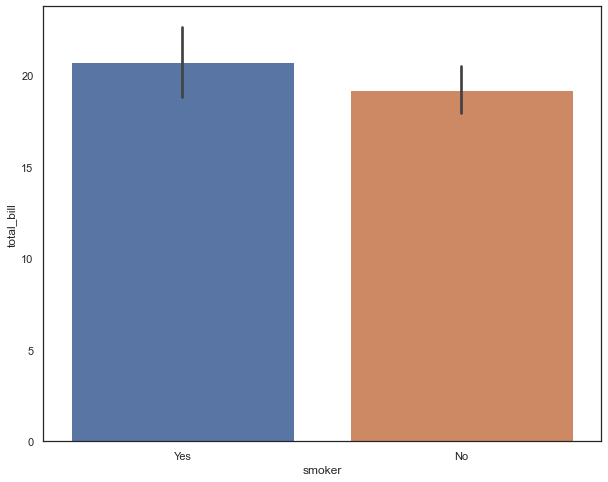

In [277]:
sns.barplot(data = tips, x ="smoker", y = "total_bill")
# 위에 검은색 무엇?? --> 편차의 정도 / errorbar 라고 함.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

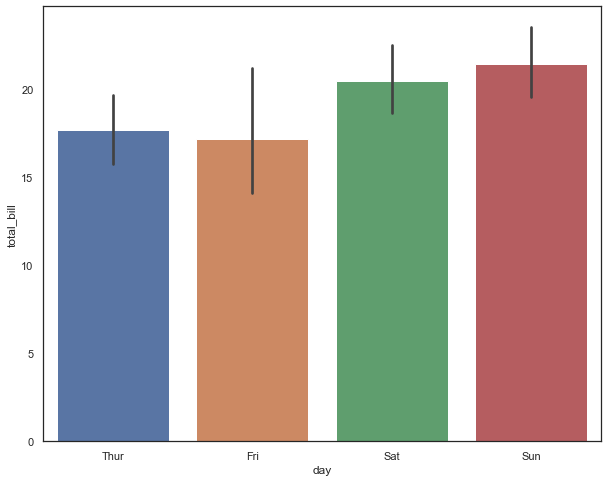

In [279]:
sns.barplot(data = tips, x ="day", y = "total_bill")

#### countplot

<AxesSubplot:xlabel='day', ylabel='count'>

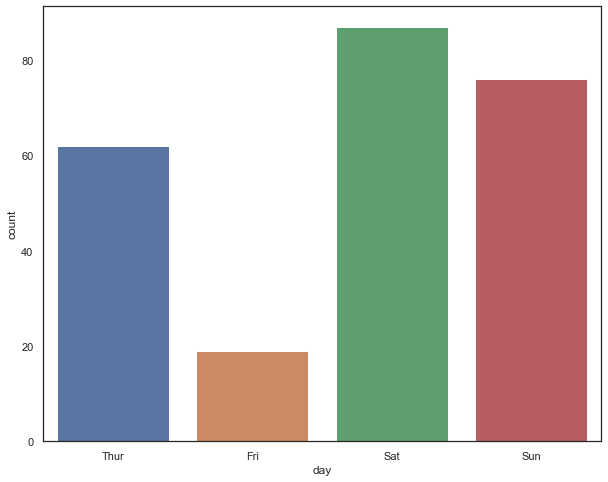

In [282]:
sns.countplot(data = tips, x ="day")

<AxesSubplot:xlabel='day', ylabel='count'>

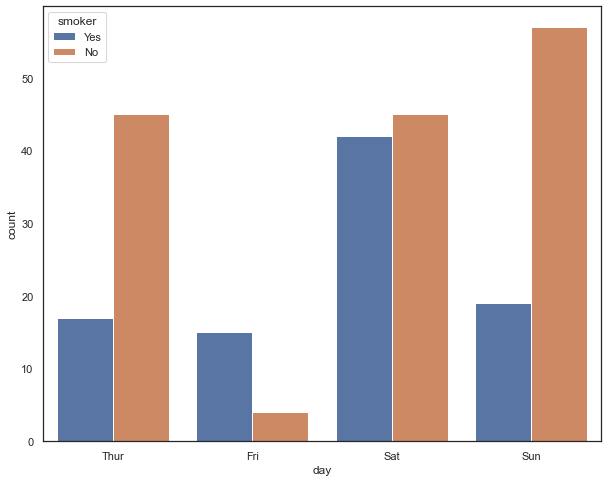

In [287]:
sns.countplot(data = tips, x ="day",
             hue = "smoker")

#### pointplot

<AxesSubplot:xlabel='time', ylabel='total_bill'>

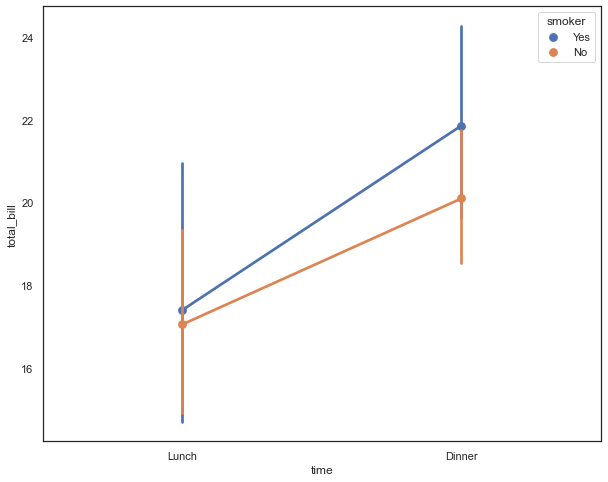

In [290]:
sns.pointplot(x = "time", y = "total_bill", hue = "smoker",
             data = tips)

### 4.2.6. Legression Plot : 데이터 분포, 회귀(선)
- 선형회귀분석(머신러닝)에 대한 결과를 그래프로 보여준다.


#### Lmplot

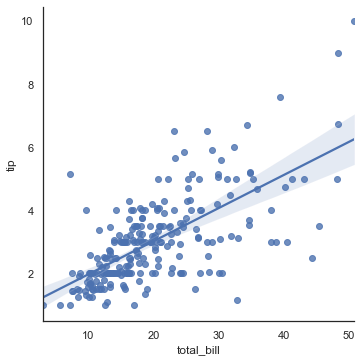

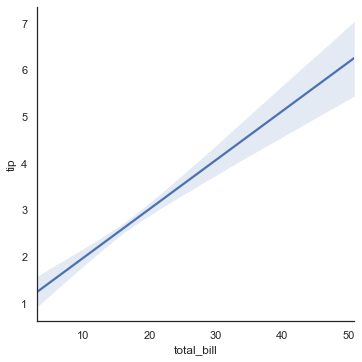

In [297]:
sns.lmplot(x = "total_bill", y ="tip", data =tips)
sns.lmplot(x = "total_bill", y ="tip", data =tips,
          scatter = False)

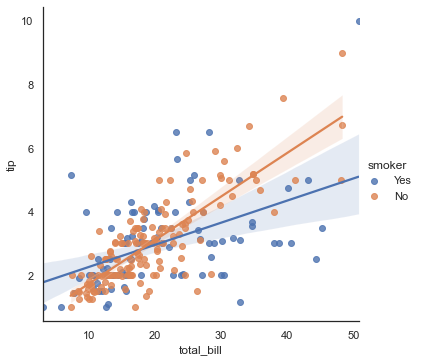

In [294]:
sns.lmplot(x = "total_bill", y ="tip", data =tips,
          hue = "smoker")

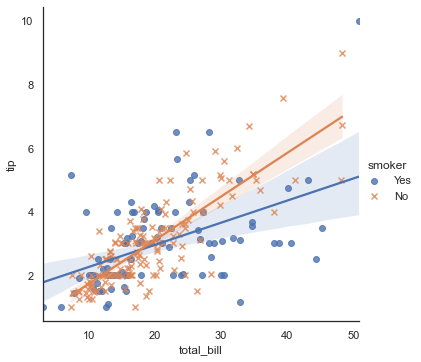

In [295]:
sns.lmplot(x = "total_bill", y ="tip", data =tips,
          hue = "smoker", markers=["o", "x"])

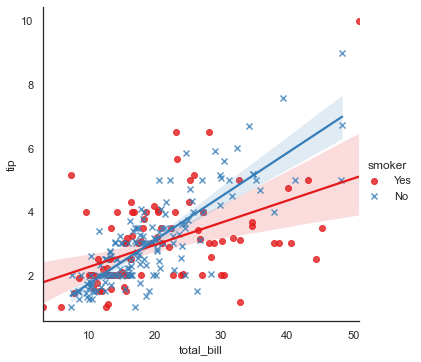

In [296]:
sns.lmplot(x = "total_bill", y ="tip", data =tips,
          hue = "smoker", markers=["o", "x"],
           palette="Set1")

#### regplot : 선형회귀 그래프

In [302]:
# anscombe : 통계학자 이름 / 통계학자 이름을 따서 만듬 데이터
anscombes.head(5)

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


<AxesSubplot:xlabel='x', ylabel='y'>

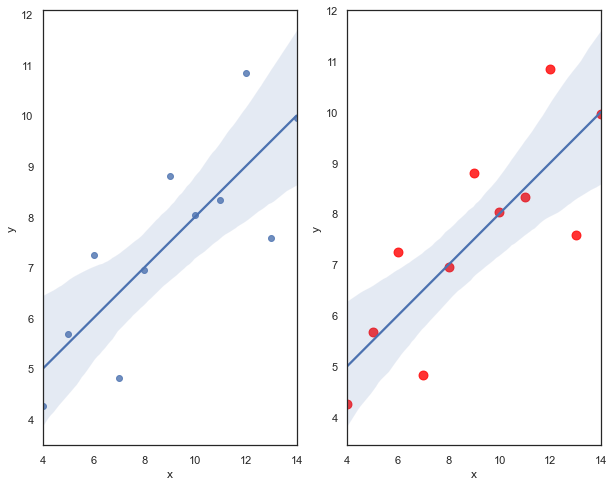

In [312]:
plt.subplot(1,2,1)
sns.regplot(data = anscombes.query("dataset == 'I'"),
            x ="x", y ="y")
plt.subplot(1,2,2)
sns.regplot(data = anscombes.query("dataset == 'I'"),
            x ="x", y ="y",
            scatter_kws = {"s" : 80, "color" : "red"})

#### residplot
- 잔차(residual)분석

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

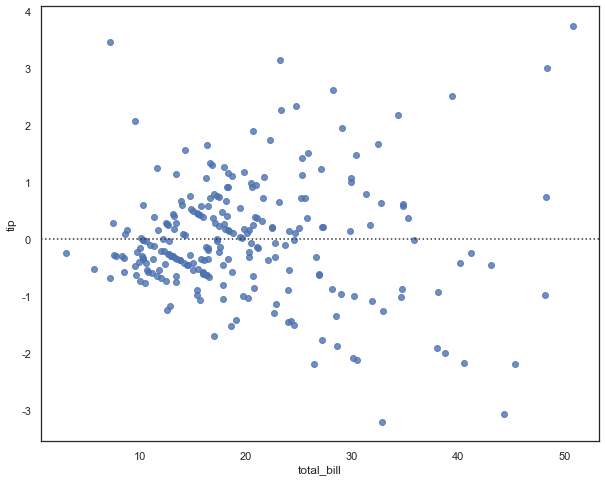

In [314]:
sns.residplot(data = tips, x = "total_bill", y ="tip")

### 4.2.7. Matrix Plot : 여러가지 변수 비교

#### heatmap
- 데이터 간의 수치에 따라 색상을 입힘으로써 직관적인 통찰을 얻을 수 있음
- 결측치를 시각적으로 확인할 수 있다.

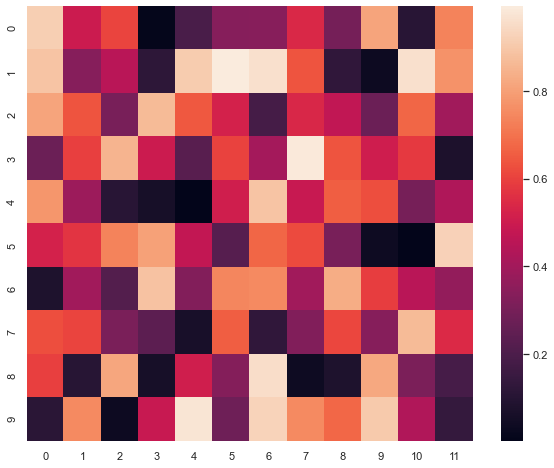

In [315]:
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data)

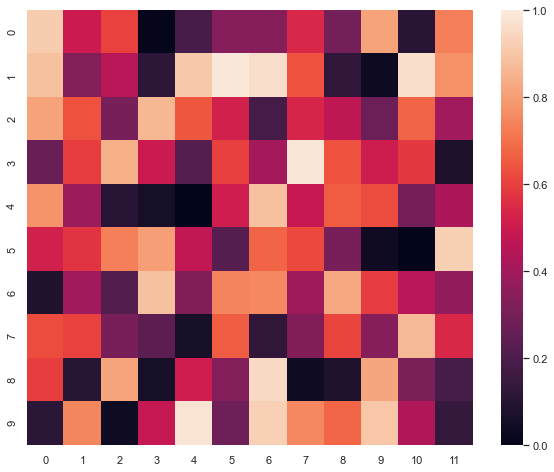

In [316]:
ax = sns.heatmap(uniform_data, vmin=0, vmax=1)

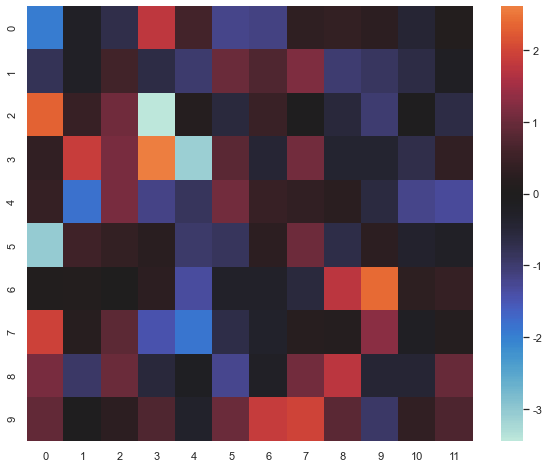

In [317]:
normal_data = np.random.randn(10, 12)
ax = sns.heatmap(normal_data, center=0)

In [326]:
flights.head(5)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [327]:
flights_pivot = flights.pivot("month","year","passengers")
flights_pivot

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


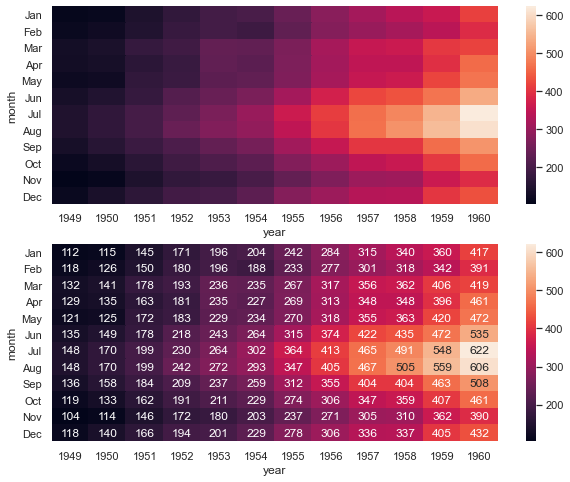

In [324]:
plt.subplot(211)
ax = sns.heatmap(flights_pivot)
plt.subplot(212)
ax = sns.heatmap(flights_pivot, annot = True, fmt = "d")

In [332]:
flights_pivot.corr()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
year,,,,,,,,,,,,
1949,1.000000,0.949435,0.944994,0.905623,0.970144,0.911553,0.908190,0.940419,0.933350,0.912513,0.901456,0.887272
1950,0.949435,1.000000,0.946923,0.957062,0.880477,0.930967,0.949866,0.938707,0.934320,0.904400,0.927191,0.887417
1951,0.944994,0.946923,1.000000,0.923131,0.939609,0.959165,0.939515,0.946961,0.946232,0.911054,0.947280,0.894268
1952,0.905623,0.957062,0.923131,1.000000,0.861005,0.942879,0.956044,0.960854,0.963146,0.960107,0.962860,0.925008
1953,0.970144,0.880477,0.939609,0.861005,1.000000,0.913945,0.884986,0.929524,0.928578,0.907120,0.902622,0.894288
1954,0.911553,0.930967,0.959165,0.942879,0.913945,1.000000,0.989433,0.984947,0.986983,0.962541,0.988882,0.965944
1955,0.908190,0.949866,0.939515,0.956044,0.884986,0.989433,1.000000,0.985527,0.982708,0.961328,0.984109,0.974451
1956,0.940419,0.938707,0.946961,0.960854,0.929524,0.984947,0.985527,1.000000,0.997125,0.983194,0.983704,0.977851
1957,0.933350,0.934320,0.946232,0.963146,0.928578,0.986983,0.982708,0.997125,1.000000,0.986762,0.988408,0.977076


<AxesSubplot:xlabel='year', ylabel='year'>

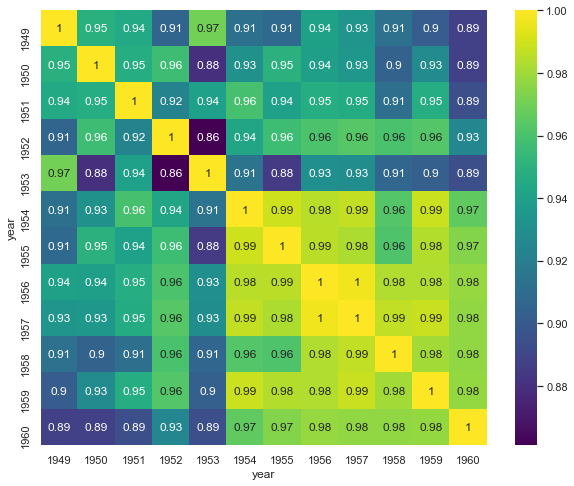

In [334]:
sns.heatmap(flights_pivot.corr(), annot = True, cmap = "viridis")

<AxesSubplot:xlabel='year', ylabel='month'>

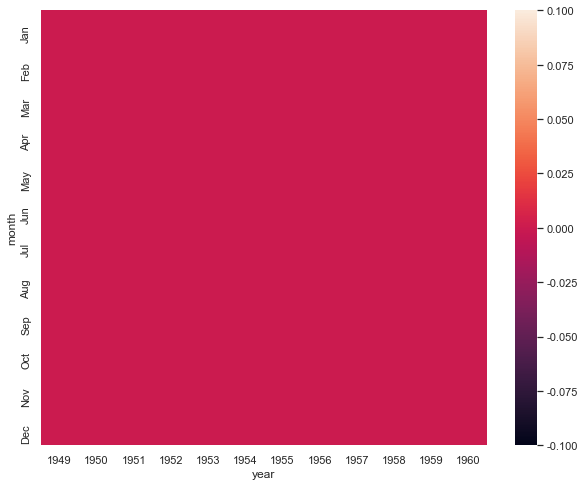

In [337]:
# 결측치를 확인 할 수 있다.
# 색 변하는거 있으면 결측치 존재
flights_pivot.isnull()
sns.heatmap(flights_pivot.isnull())

#### clustermap
- a hierarchically-clustered heatmap(위계 존재)

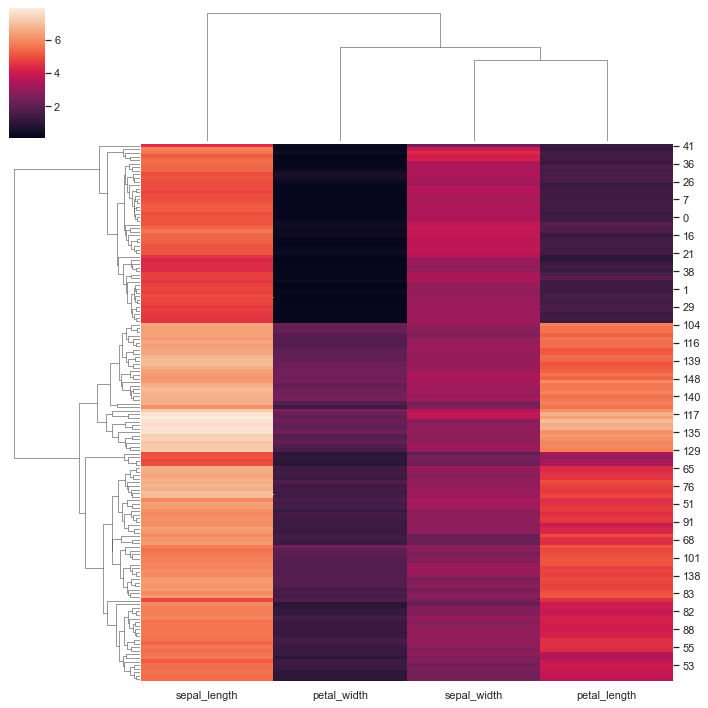

In [338]:
iris = sns.load_dataset("iris")
species = iris.pop("species")
g = sns.clustermap(iris)

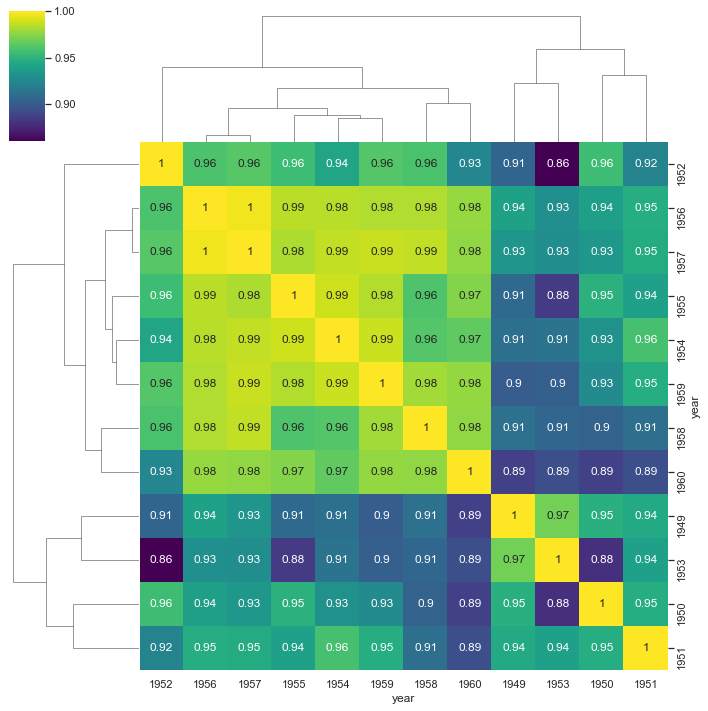

In [339]:
sns.clustermap(flights_pivot.corr(), annot = True, cmap = "viridis")